In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Modèle générateur

On a une fonction (dans la pratique elle sera inconnue) $g: [0,L] \to \mathbb{R}$.

In [2]:
L = 5.

In [12]:
def g(xs: float) -> float:
    return np.sin(10. * np.pi * xs / L) / (1. + np.exp(5 * xs / L))

In [13]:
xs = np.linspace(0, L, 500)
ys = g(xs)


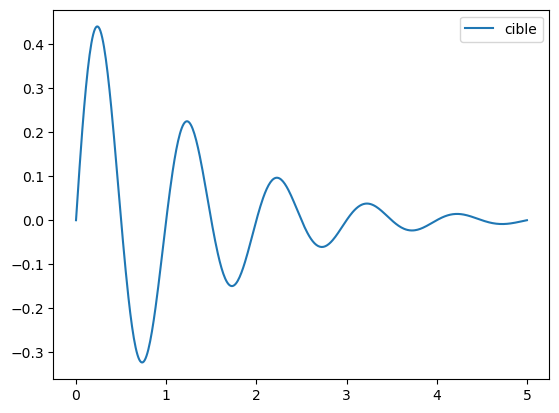

In [14]:
fig, rep = plt.subplots()
rep.plot(xs, ys, label="cible")
rep.legend()

## Dataset

On a trois possibilités par ordre de réalisme/difficulté croissant.

Soit $N$ la taille de l'échantillon.

On a les données $(x_k, y_k)$ pour $0 \leq k \leq N$ données par

\begin{equation}
\begin{cases}
x_k= \frac{k L}{N}\\
y_k = g(x_k)
\end{cases}
\end{equation}

\begin{equation}
\begin{cases}
x_k= \frac{k L}{N}\\
y_k = g(x_k) + \epsilon E_k
\end{cases}
\end{equation}
où $(E_k)_{0\leq k \leq N}$ sont i.i.d (par exemple $\mathcal{N}(0, 1)$).

\begin{equation}
\begin{cases}
y_k = g(x'_k) + \epsilon E'_k
\end{cases}
\end{equation}

où $(E'_k)_{0\leq k \leq N}$ sont i.i.d (par exemple $\mathcal{N}(0, 1)$).
et les $(x'_k)_{0\leq k \leq N}$ sont i.i.d. dans $[0,L]$ (par exemple pour la loi uniforme).

**EXERCICE**

Faites trois graphes où on supperpose le graphe de $g$, et les datasets.

Text(0.5, 1.0, 'Premier scénario')

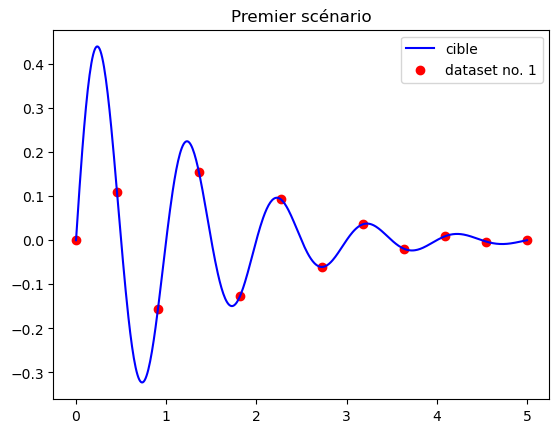

In [18]:
# Première version
N = 11
xk = np.linspace(0, L, N+1)
yk = g(xk)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

rep.scatter(xk, yk, color="red", label="dataset no. 1")
rep.legend()
rep.set_title("Premier scénario")

Text(0.5, 1.0, 'Deuxième scénario')

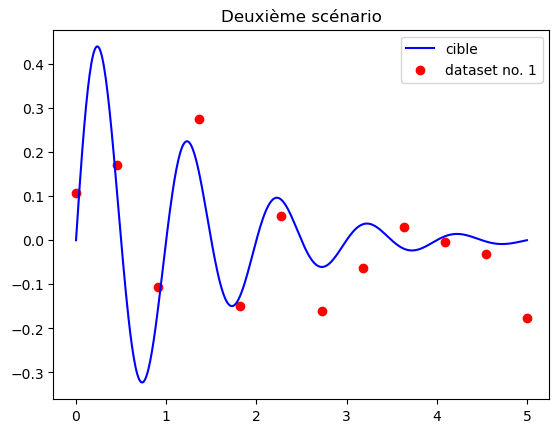

In [19]:
# Deuxième version
N = 11
epsilon = 0.1

xk = np.linspace(0, L, N+1)
yk = g(xk) + epsilon * np.random.randn(N+1)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

rep.scatter(xk, yk, color="red", label="dataset no. 1")
rep.legend()
rep.set_title("Deuxième scénario")

Text(0.5, 1.0, 'Troisième scénario')

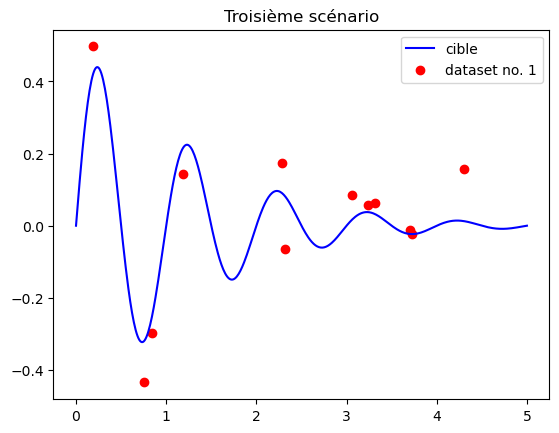

In [20]:
# Troisième version
N = 11
epsilon = 0.1

xk = np.random.uniform(low=0, high=L, size=(N+1,))
yk = g(xk) + epsilon * np.random.randn(N+1)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

rep.scatter(xk, yk, color="red", label="dataset no. 1")
rep.legend()
rep.set_title("Troisième scénario")

## Modèles

On cherche dans une classe de fonction $\mathcal{E}$ qui sont toutes $[0, L] \to \mathbb{R}$,
celle qui "colle" le mieux au dataset.

On va chercher des fonctions d'erreurs que l'on minimisera:

On cherche:
1. $\phi_2 = \text{argmin}_{\mathcal{E}} L_2(\phi)$
2. $\phi_1 = \text{argmin}_{\mathcal{E}} L_1(\phi)$

où

\begin{equation}
L_2(\phi)= \frac{1}{N+1} \sum_{k=0}^N (\phi(x_k) - y_k)^2.
\end{equation}

\begin{equation}
L_1(\phi)= \frac{1}{N+1} \sum_{k=0}^N |\phi(x_k) - y_k|.
\end{equation}

**QUESTION**

Si $L$ vaut $0$, quel problème et quelles solutions connues obtient-on?


Pour l'erreur quadratique on récupère la moyenne des $y_k$.
Pour l'erreur en valeur absolu on récupère une médiane.

## Premier cas simple

$\mathcal{E}$ est l'ensemble des fonctions affines.

**EXERCICE**

Calculer les deux fonctions optimales.

Par exemple si le modèle est noté $y=ax+b$ on cherche à minimiser

\begin{equation}
J_2(a,b) = \frac{1}{N+1} \sum_{k=0}^N (a x_k + b - y_k)^2.
\end{equation}
ou
\begin{equation}
J_1(a,b) = \frac{1}{N+1} \sum_{k=0}^N |a x_k + b - y_k|.
\end{equation}

Pour $J_2$ on a explicitement en utilisant le convexité et en annulant le gradient


\begin{equation}
\begin{cases}
a = \frac{\langle x \cdot y \rangle \langle 1 \rangle - \langle x \rangle \langle y \rangle  }{\langle x^2\rangle \langle 1 \rangle -\langle x \rangle \langle  x\rangle}\\
b = \frac{\langle x^2 \rangle \langle y \rangle - \langle x\rangle \langle x \cdot y \rangle  }{\langle x^2 \rangle \langle 1 \rangle -\langle x \rangle \langle x \rangle}
\end{cases}
\end{equation}


Pour $J_1$ on procédera différement ensuite.

**EXERCICE**

Utiliser cette formule pour tracer la meilleure approximation correspondant aux trois datasets vus précédemment.

Text(0.5, 1.0, 'Premier scénario')

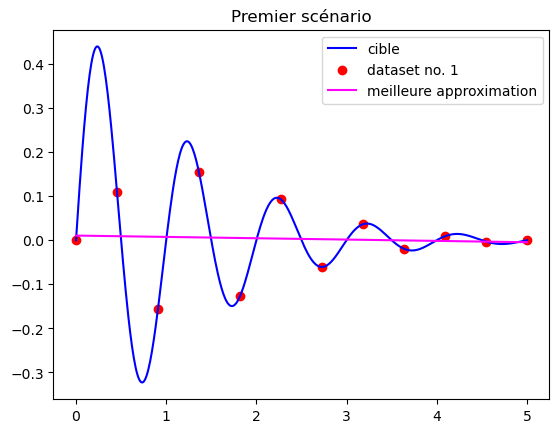

In [23]:
# Première version
N = 11
xk = np.linspace(0, L, N+1)
yk = g(xk)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

rep.scatter(xk, yk, color="red", label="dataset no. 1")

a = (
    (np.sum(xk * yk) * (N+1) - np.sum(xk) * np.sum(yk)) 
    / 
    (np.sum(xk * xk) * (N+1) - np.sum(xk) * np.sum(xk))
)
b = (
    (np.sum(xk * xk) * np.sum(yk) - np.sum(xk) * np.sum(xk * yk)) 
    / 
    (np.sum(xk *xk) * (N+1) - np.sum(xk) * np.sum(xk))
)
rep.plot( xs, a * xs + b, color="magenta", label="meilleure approximation")


rep.legend()
rep.set_title("Premier scénario")

Text(0.5, 1.0, 'Deuxième scénario')

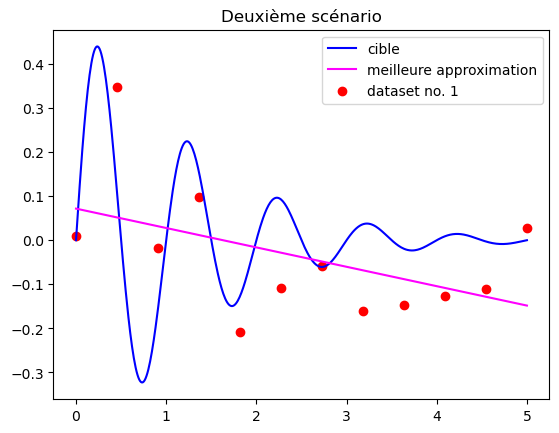

In [25]:
# Deuxième version
N = 11
epsilon = 0.1

xk = np.linspace(0, L, N+1)
yk = g(xk) + epsilon * np.random.randn(N+1)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

a = (
    (np.sum(xk * yk) * (N+1) - np.sum(xk) * np.sum(yk)) 
    / 
    (np.sum(xk * xk) * (N+1) - np.sum(xk) * np.sum(xk))
)
b = (
    (np.sum(xk * xk) * np.sum(yk) - np.sum(xk) * np.sum(xk * yk)) 
    / 
    (np.sum(xk *xk) * (N+1) - np.sum(xk) * np.sum(xk))
)
rep.plot( xs, a * xs + b, color="magenta", label="meilleure approximation")

rep.scatter(xk, yk, color="red", label="dataset no. 1")
rep.legend()
rep.set_title("Deuxième scénario")

Text(0.5, 1.0, 'Troisième scénario')

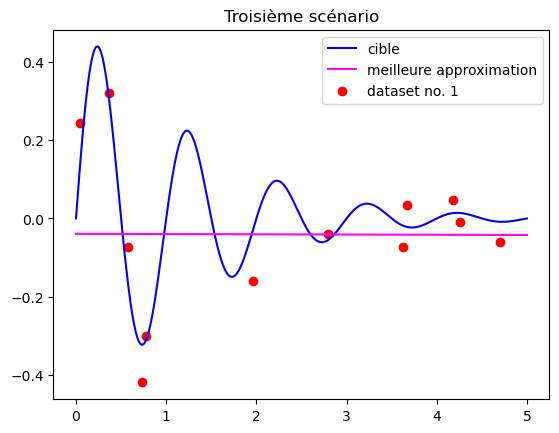

In [24]:
# Troisième version
N = 11
epsilon = 0.1

xk = np.random.uniform(low=0, high=L, size=(N+1,))
yk = g(xk) + epsilon * np.random.randn(N+1)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

a = (
    (np.sum(xk * yk) * (N+1) - np.sum(xk) * np.sum(yk)) 
    / 
    (np.sum(xk * xk) * (N+1) - np.sum(xk) * np.sum(xk))
)
b = (
    (np.sum(xk * xk) * np.sum(yk) - np.sum(xk) * np.sum(xk * yk)) 
    / 
    (np.sum(xk *xk) * (N+1) - np.sum(xk) * np.sum(xk))
)
rep.plot( xs, a * xs + b, color="magenta", label="meilleure approximation")

rep.scatter(xk, yk, color="red", label="dataset no. 1")
rep.legend()
rep.set_title("Troisième scénario")

**EXERCICE**

Coder une fonction python qui détermine le couple $(a,b)$ minimisant $J_1$.
On utilisera le module importé précédemment `scipy.optimize` et plus précisément la fonction `minimize`.

In [29]:
def J1(args: np.array, xk, yk) -> float:
    a, b = args
    
    return np.sum(np.abs(a * xk + b - yk)) / (1 + len(xk))

opt.minimize(fun=J1, x0=np.array((0,0)), args=(xk, yk))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.07886340711456893
        x: [-3.380e-02  1.130e-02]
      nit: 5
      jac: [-9.313e-10  0.000e+00]
 hess_inv: [[ 5.077e-03 -8.026e-03]
            [-8.026e-03  2.070e-02]]
     nfev: 36
     njev: 12

Text(0.5, 1.0, 'Premier scénario')

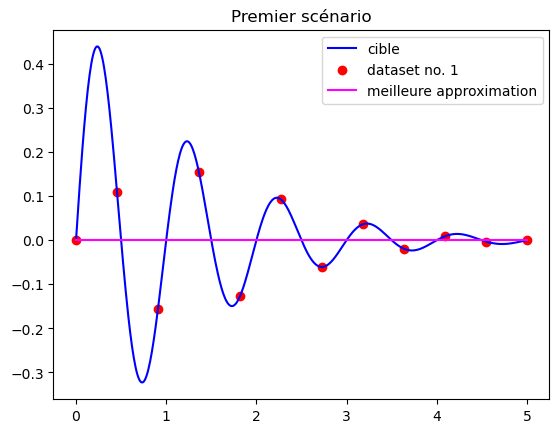

In [30]:
# Première version
N = 11
xk = np.linspace(0, L, N+1)
yk = g(xk)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

rep.scatter(xk, yk, color="red", label="dataset no. 1")

a, b = opt.minimize(fun=J1, x0=np.array((0,0)), args=(xk, yk)).x
rep.plot( xs, a * xs + b, color="magenta", label="meilleure approximation")


rep.legend()
rep.set_title("Premier scénario")

Text(0.5, 1.0, 'Deuxième scénario')

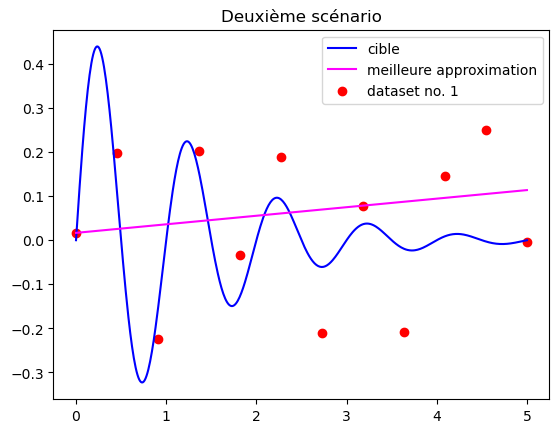

In [31]:
# Deuxième version
N = 11
epsilon = 0.1

xk = np.linspace(0, L, N+1)
yk = g(xk) + epsilon * np.random.randn(N+1)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

a, b = opt.minimize(fun=J1, x0=np.array((0,0)), args=(xk, yk)).x
rep.plot( xs, a * xs + b, color="magenta", label="meilleure approximation")

rep.scatter(xk, yk, color="red", label="dataset no. 1")
rep.legend()
rep.set_title("Deuxième scénario")

Text(0.5, 1.0, 'Troisième scénario')

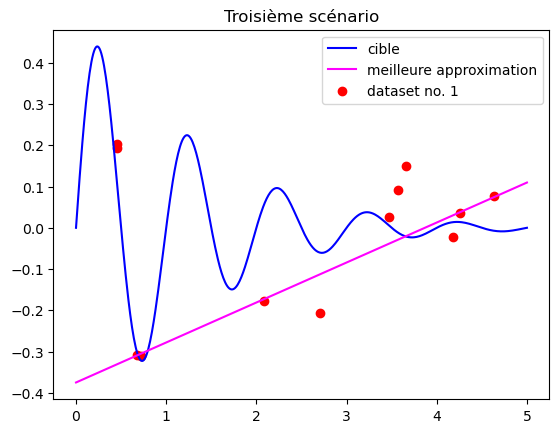

In [32]:
# Troisième version
N = 11
epsilon = 0.1

xk = np.random.uniform(low=0, high=L, size=(N+1,))
yk = g(xk) + epsilon * np.random.randn(N+1)

fig,rep = plt.subplots()
xs = np.linspace(0,L,500)
ys = g(xs)
rep.plot(xs, ys, color="blue", label="cible")

a, b = opt.minimize(fun=J1, x0=np.array((0,0)), args=(xk, yk)).x
rep.plot( xs, a * xs + b, color="magenta", label="meilleure approximation")

rep.scatter(xk, yk, color="red", label="dataset no. 1")
rep.legend()
rep.set_title("Troisième scénario")

**CONCLUSION** 

Les résultats sont médiocres, mais clairement le modèle n'est pas assez sophistiqué pour reproduire la courbe bleu.

On va chercher à utiliser des modèles avec plus de paramètres.

## Modèle polynomial

**EXERCICE**

Reprenez la partie précédente mais cette fois ci $\mathcal{E}$
va être l'ensemble des polynômes de degrés inférieur ou égal à $d$, pour un $d$ fixé.

On utilisera juste de la minimisation numérique, plutôt que de calculer les formules explicites dans le cas de l'erreur quadratique.

On aurait donc $\phi(x) = \sum_{i=0}^d a_i x^i$.

Les prédicteurs sont donc paramétrés par des vecteurs de $\mathbb{R}^{d+1}$.

Et

$$
J_2(a_0,...,a_d)=\frac{1}{N+1}\sum_{k=0}^N \left(y_k - \sum_{i=0}^d a_i (x_k)^i \right)^2.
$$